### 2024/05/24 分類結果を解析する

##### ▶ライブラリ

In [2]:
import pandas as pd
import numpy as np
import requests
import io
import math
import copy
from scipy.stats import gmean
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import patches
from pipeline_functions import PipelineFunctions
pf = PipelineFunctions()
from view_functions import ViewFunctions
vf = ViewFunctions()

import umap
from sklearn.manifold import TSNE
import seaborn as sns
palette = ['#CC521D', '#4F4AD7', '#39AE3D']
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
def show_plot(x, y, color):
    plt.rcParams['font.family'] = 'Times New Roman'
    PLOT_COLOER= 'green'
    FACE_COLOR = 'white'
    PLOT_WIDTH = 0.5
    FIG_SIZE = (30, 5)
    fig, ax = plt.subplots(facecolor=FACE_COLOR, figsize=(FIG_SIZE[0],FIG_SIZE[1]))
    ax.set_ylim([0, 1])    # y方向の描画範囲を指定
    ax.set_facecolor(FACE_COLOR)
    ax.plot(x, y, color=color, linewidth=PLOT_WIDTH)  
    plt.show()
    return

##### ▶組み合わせごとの結果をまとめた表を作成する

In [54]:
### 変えるパラメータ ###
# PARAM_COMBO_COORD = pd.read_csv('../temp/param_combo.csv', delimiter=',', index_col=0)
# PARAM_COMBO_GRAD = pd.read_csv('../temp/param_combo_grad.csv', delimiter=',', index_col=0)
# PARAM_COMBO = pd.concat([PARAM_COMBO_COORD, PARAM_COMBO_GRAD], axis=0)

# ### 各機械学習の結果csvが格納されたフォルダ ###
# method = 'rf'
# RESULT_FOLDER = f'../temp/result_{method}'

# results = []
# for i, row in PARAM_COMBO.iterrows():
#     ### パラメータの組み合わせ ###
#     ptcnt_type, ptcnt, X_col = row['ptcnt_type'], row['ptcnt'], row['X_col']
#     ### 結果df ###
#     result = pd.read_csv(f'{RESULT_FOLDER}/{ptcnt_type}_{ptcnt}_{X_col}.csv', delimiter=',', index_col=0)
#     result['ptcnt_type'] = [ptcnt_type for i in range(len(result))]
#     result['ptcnt'] = [ptcnt for i in range(len(result))]
#     result['X_col'] = [X_col for i in range(len(result))]
    
#     results.append(result)
    
# compile_result = pd.concat(results, axis=0)

# compile_result.to_csv(f'../temp/complie_result_csv/compile_result_{method}.csv')

##### ▶結果データを読み込む

In [4]:
SVM_RESULT = '../temp/complie_result_csv/compile_result_svm.csv'
KNN_RESULT = '../temp/complie_result_csv/compile_result_knn.csv'
LGR_RESULT = '../temp/complie_result_csv/compile_result_lgr.csv'
RF_RESULT = '../temp/complie_result_csv/compile_result_rf.csv'
svm = pd.read_csv(SVM_RESULT, delimiter=',', index_col=0)
knn = pd.read_csv(KNN_RESULT, delimiter=',', index_col=0)
lgr = pd.read_csv(LGR_RESULT, delimiter=',', index_col=0)
rf = pd.read_csv(RF_RESULT, delimiter=',', index_col=0)

##### ▶K-Foldの平均精度の列を追加

In [98]:
# K = 5
# mean_score_dict = {
#     'kfold_mean_recall': [],
#     'kfold_mean_precision': [],
#     'kfold_mean_f1': [],
#     'kfold_mean_accuracy': []
# }

# result = lgr.copy()
# for i, row in result.iterrows():
#     for score in ['recall', 'precision', 'f1', 'accuracy']:
#         score_sum = sum([row[f'kfold_{i}_{score}'] for i in range(K)])
#         score_mean = score_sum / K
#         mean_score_dict[f'kfold_mean_{score}'].append(score_mean)

# result['kfold_mean_recall'] = mean_score_dict['kfold_mean_recall']
# result['kfold_mean_precision'] = mean_score_dict['kfold_mean_precision']
# result['kfold_mean_f1'] = mean_score_dict['kfold_mean_f1']
# result['kfold_mean_accuracy'] = mean_score_dict['kfold_mean_accuracy']

# result.reset_index().to_csv('../temp/complie_result_csv/compile_result_lgr.csv')

##### ▶各手法の精度の最大値を求める

##### ▶長さが均一になるように補間した場合の最大精度

In [234]:
score_cols = ['test_f1', 'test_recall', 'test_precision', 'kfold_mean_f1', 'kfold_mean_recall', 'kfold_mean_precision']
result = svm.query('ptcnt_type == 2')
max_val= 0
max_index = 0
score_col = 'kfold_mean_f1'

for i, row in result.iterrows():
    max_index = i if row[score_col] > max_val else max_index
    max_val = row[score_col] if row[score_col] > max_val else max_val
    
print(max_val)
print(max_index)
result[max_index:max_index+1][score_cols]

0.9748351194212196
8884


,test_f1,test_recall,test_precision,kfold_mean_f1,kfold_mean_recall,kfold_mean_precision
16660,0.963158,0.948187,0.97861,0.964733,0.966886,0.962763


In [235]:
score_cols = ['test_f1', 'test_recall', 'test_precision', 'kfold_mean_f1', 'kfold_mean_recall', 'kfold_mean_precision']
result = knn.query('ptcnt_type == 2')
max_val= 0
max_index = 0
score_col = 'kfold_mean_f1'

for i, row in result.iterrows():
    max_index = i if row[score_col] > max_val else max_index
    max_val = row[score_col] if row[score_col] > max_val else max_val
    
print(max_val)
print(max_index)
result[max_index:max_index+1][score_cols]

0.971710758881568
4722


,test_f1,test_recall,test_precision,kfold_mean_f1,kfold_mean_recall,kfold_mean_precision
8934,0.969231,0.979275,0.959391,0.968239,0.975678,0.961105


In [3]:
max_score_svm = pd.concat([svm[2193:2194], svm[1327:1328]], axis=0)
max_score_knn = pd.concat([knn[8775:8776], knn[251:252]], axis=0)
max_score_lgr = pd.concat([lgr[1085:1086], lgr[4349:4350]], axis=0)
max_score_rf = pd.concat([rf[5134:5135], rf[28273:28274]], axis=0)



In [4]:
score_col = ['test_f1', 'test_recall', 'test_precision', 'kfold_mean_f1', 'kfold_mean_recall', 'kfold_mean_precision']
metrix = ['test_max', 'train_max', 'test_max', 'train_max',
          'test_max', 'train_max', 'test_max', 'train_max']
method = ['svm', 'svm', 'knn', 'knn', 'lgr', 'lgr', 'rf', 'rf']
max_score = pd.concat([
    max_score_svm[score_col],
    max_score_knn[score_col],
    max_score_lgr[score_col],
    max_score_rf[score_col]], axis=0)
max_score['metrix'] = metrix
max_score['method'] = method

max_score.to_excel('../temp/max_score.xlsx')

##### ▶train最大精度

In [5]:
max_score.query('metrix == "train_max"')

,test_f1,test_recall,test_precision,kfold_mean_f1,kfold_mean_recall,kfold_mean_precision,metrix,method
1327,0.972152,0.994819,0.950495,0.977155,0.991184,0.963597,train_max,svm
251,0.974359,0.984456,0.964467,0.973911,0.986740,0.961514,train_max,knn
4349,0.959391,0.979275,0.940299,0.971651,0.982320,0.961340,train_max,lgr
28273,0.968421,0.953368,0.983957,0.974397,0.966886,0.982235,train_max,rf


##### ▶test最大精度

In [6]:
max_score.query('metrix == "test_max"')

,test_f1,test_recall,test_precision,kfold_mean_f1,kfold_mean_recall,kfold_mean_precision,metrix,method
2193,0.984615,0.994819,0.974619,0.967894,0.964689,0.971134,test_max,svm
8775,0.979695,1.000000,0.960199,0.953298,0.966911,0.940118,test_max,knn
1085,0.979381,0.984456,0.974359,0.961685,0.969109,0.954615,test_max,lgr
5134,0.976623,0.974093,0.979167,0.950509,0.935873,0.965925,test_max,rf


In [128]:
# svm[1327:1328]
knn[251:252]
lgr[4349:4350]
rf[28273:28274]

,index,criterion,max_features,random_state,n_estimators,max_depth,max_leaf_nodes,kfold_0_recall,kfold_0_precision,kfold_0_f1,...,test_precision,test_f1,test_accuracy,ptcnt_type,ptcnt,X_col,kfold_mean_recall,kfold_mean_precision,kfold_mean_f1,kfold_mean_accuracy
28273,31,gini,sqrt,1,50,10,10,0.989011,0.967742,0.978261,...,0.983957,0.968421,0.96129,2,52,startend_seg_cossim,0.966886,0.982235,0.974397,0.968276


##### ▶2つの補間方法を2群として対応ありの検定

c:\Users\ispec\MyWorkSpace\python\drawing_2024\.venv\lib\site-packages\scipy\stats\_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


{'whiskers': [<matplotlib.lines.Line2D at 0x22dd7e1b7c0>,
 'caps': [<matplotlib.lines.Line2D at 0x22dd7e1bd00>,
 'boxes': [<matplotlib.lines.Line2D at 0x22dd7e1b520>],
 'medians': [<matplotlib.lines.Line2D at 0x22dd98dc280>],
 'fliers': [<matplotlib.lines.Line2D at 0x22dd98dc520>],
 'means': []}

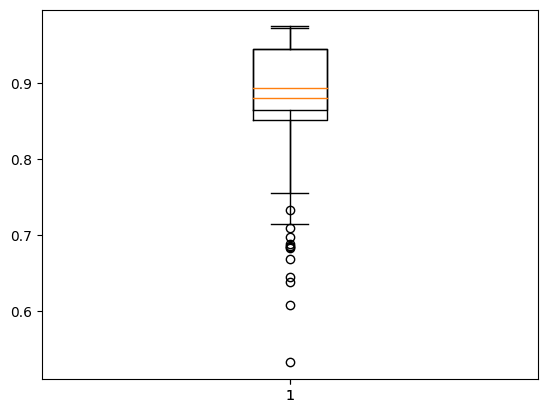

In [29]:
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
method = knn
col = 'kfold_mean_f1'
group_1 = method.query('ptcnt_type == 1')
group_2 = method.query('ptcnt_type == 2').query('X_col != "startend_grad_cossim" and X_col != "segment_grad_cossim"')
# group_3 = method.query('ptcnt_type == 2').query('X_col == "startend_grad_cossim" or X_col == "segment_grad_cossim"')

# show_plot(range(len(group_1)), group_1[col], 'red')
# show_plot(range(len(group_2)), group_2[col], 'blue')

# plt.xlim([0, 1])
# plt.hist(group_1[col], bins=50)
# plt.hist(group_2[col], bins=50, alpha=0.5)
# plt.hist(group_3[col], bins=20, alpha=0.5)

wilcoxon(group_1[col], group_2[col], mode='exact', alternative='two-sided')

plt.boxplot(group_1[col])
plt.boxplot(group_2[col])

# group_1[col]

##### ▶座標数ごとの分布を確認

KruskalResult(statistic=485.93410097930865, pvalue=3.025176290737693e-106)
MannwhitneyuResult(statistic=7475472.5, pvalue=1.8308145197070496e-58)
MannwhitneyuResult(statistic=6808432.0, pvalue=2.2257997414786474e-14)
MannwhitneyuResult(statistic=4394143.0, pvalue=2.774054994052298e-92)


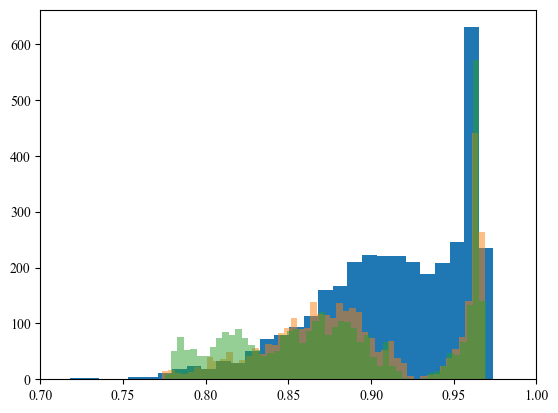

In [228]:
from scipy.stats import kruskal
col = 'kfold_mean_f1'
method = knn

ptcnt_1 = method.query('3 <= ptcnt and ptcnt <= 29')
ptcnt_2 = method.query('30 <= ptcnt and ptcnt <= 56')
ptcnt_3 = method.query('57 <= ptcnt and ptcnt <= 83')

plt.xlim([0.7, 1])
plt.hist(ptcnt_1[col], bins=50)
plt.hist(ptcnt_2[col], bins=50, alpha=0.5)
plt.hist(ptcnt_3[col], bins=50, alpha=0.5)

print(kruskal(ptcnt_1[col], ptcnt_2[col], ptcnt_3[col]))
print(mannwhitneyu(ptcnt_1[col], ptcnt_2[col], alternative='two-sided'))
print(mannwhitneyu(ptcnt_2[col], ptcnt_3[col], alternative='two-sided'))
print(mannwhitneyu(ptcnt_3[col], ptcnt_1[col], alternative='two-sided'))


##### ▶特徴量ごとの分布を確認

KruskalResult(statistic=2768.289532896209, pvalue=0.0)


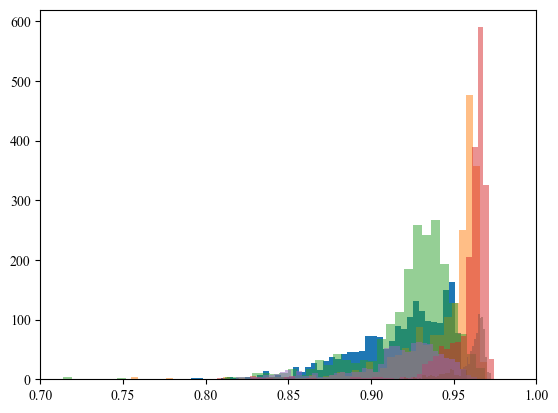

In [227]:
col = 'kfold_mean_f1'
method = rf.sample(n=10000, random_state=1)
feature_1 = method.query('X_col == "org_coord"')
feature_2 = method.query('X_col == "segment_vec"')
feature_3 = method.query('X_col == "segment_cossim"')
feature_4 = method.query('X_col == "startend_seg_cossim"')
feature_5 = method.query('X_col == "segment_grad_cossim"')
feature_6 = method.query('X_col == "startend_grad_cossim"')

plt.xlim([0.7, 1])
plt.hist(feature_1[col], bins=50)
plt.hist(feature_2[col], bins=50, alpha=0.5)
plt.hist(feature_3[col], bins=50, alpha=0.5)
plt.hist(feature_4[col], bins=50, alpha=0.5)
plt.hist(feature_5[col], bins=50, alpha=0.5)
plt.hist(feature_6[col], bins=50, alpha=0.5)

print(kruskal(feature_4[col], feature_6[col], feature_3[col]))
# print(mannwhitneyu(feature_1[col], feature_2[col], alternative='two-sided'))
# print(mannwhitneyu(feature_2[col], feature_3[col], alternative='two-sided'))
# print(mannwhitneyu(feature_3[col], feature_4[col], alternative='two-sided'))


##### ▶ハイパーパラメータごとの精度を確認

##### ▶▶SVM

(array([  3.,   2.,   1.,  55.,   1.,   1.,   0.,   0.,   0.,   2.,   2.,
          0.,   2.,   2.,   3.,   1.,   3.,   5.,   5.,   5.,   5.,  20.,
         33.,  24.,  14.,  21.,  21.,  15.,  20.,  51.,  46.,  50.,  64.,
         55.,  72.,  81.,  97.,  98., 147., 195., 251., 357., 500., 707.,
        629., 479., 321., 286.,  82.,  14.]),
 array([0.75164426, 0.75612852, 0.76061278, 0.76509704, 0.7695813 ,
        0.77406556, 0.77854982, 0.78303408, 0.78751834, 0.7920026 ,
        0.79648686, 0.80097112, 0.80545538, 0.80993964, 0.8144239 ,
        0.81890816, 0.82339242, 0.82787668, 0.83236094, 0.8368452 ,
        0.84132946, 0.84581372, 0.85029798, 0.85478224, 0.8592665 ,
        0.86375076, 0.86823502, 0.87271928, 0.87720354, 0.8816878 ,
        0.88617206, 0.89065632, 0.89514058, 0.89962484, 0.9041091 ,
        0.90859336, 0.91307762, 0.91756188, 0.92204614, 0.9265304 ,
        0.93101466, 0.93549892, 0.93998318, 0.94446744, 0.9489517 ,
        0.95343596, 0.95792022, 0.96240448, 0.

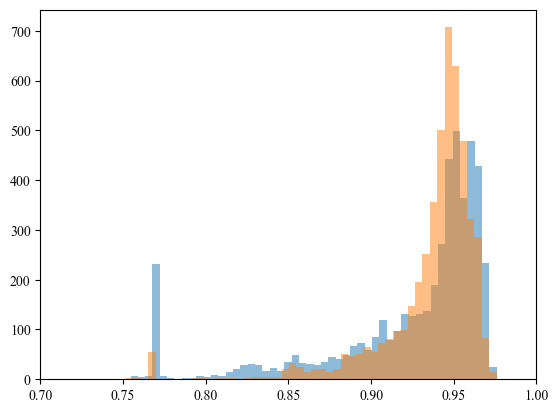

In [192]:
col = 'kfold_mean_f1'
method = svm

c_1 = method.query('c == 1')
c_5 = method.query('c == 5')
c_20 = method.query('c == 20')
c_100 = method.query('c == 100')

gamma_001 = method.query('gamma == 0.01')
gamma_01 = method.query('gamma == 0.1')
gamma_05 = method.query('gamma == 0.5')
gamma_1 = method.query('gamma == 1')
gamma_5 = method.query('gamma == 5')
gamma_20 = method.query('gamma == 20')

plt.xlim([0.7, 1])
# plt.hist(gamma_001[col], bins=50)
# plt.hist(gamma_01[col], bins=50, alpha=0.5)
# plt.hist(gamma_05[col], bins=50, alpha=0.5)
# plt.hist(gamma_1[col], bins=50, alpha=0.5)
# plt.hist(gamma_5[col], bins=50, alpha=0.5)
# plt.hist(gamma_20[col], bins=50, alpha=0.5)

plt.hist(c_1[col], bins=50, alpha=0.5)
# plt.hist(c_5[col], bins=50, alpha=0.5)
# plt.hist(c_20[col], bins=50, alpha=0.5)
plt.hist(c_100[col], bins=50, alpha=0.5)

##### ▶▶KNN

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   3.,  13.,  24.,
         18.,  18.,  13.,  12.,  24.,  27.,  39.,  74.,  33.,  30.,  42.,
          8.,  25.,  67.,  10.,  13.,   8.,   9.,   9.,  11.,   8.,   9.,
          7.,  10.,   7.,  19., 174.,  41.]),
 array([0.6843001 , 0.69004837, 0.69579664, 0.7015449 , 0.70729317,
        0.71304144, 0.71878971, 0.72453798, 0.73028625, 0.73603452,
        0.74178279, 0.74753106, 0.75327933, 0.75902759, 0.76477586,
        0.77052413, 0.7762724 , 0.78202067, 0.78776894, 0.79351721,
        0.79926548, 0.80501375, 0.81076202, 0.81651028, 0.82225855,
        0.82800682, 0.83375509, 0.83950336, 0.84525163, 0.8509999 ,
        0.85674817, 0.86249644, 0.86824471, 0.87399297, 0.87974124,
        0.88548951, 0.89123778, 0.89698605, 0.90273432, 0.90848259,
        0.91423086, 0.91997913, 0.9257274 , 0.93147567, 0.93722393,
        0.9429722 , 0.94872047, 0.95446874, 0.

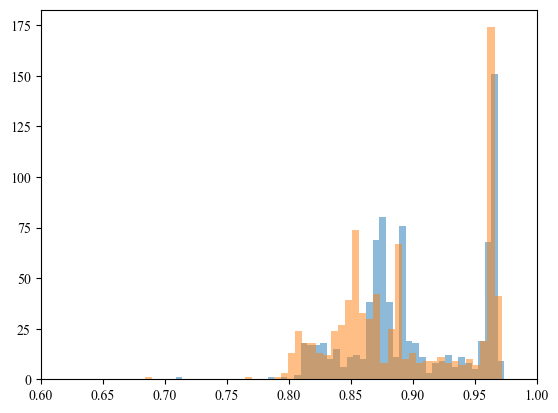

In [185]:
col = 'kfold_mean_f1'
method = knn

neighbors_1 = method.query('n_neighbors == 1')
neighbors_2 = method.query('n_neighbors == 2')
neighbors_3 = method.query('n_neighbors == 3')
neighbors_4 = method.query('n_neighbors == 4')
neighbors_5 = method.query('n_neighbors == 5')
neighbors_6 = method.query('n_neighbors == 6')
neighbors_7 = method.query('n_neighbors == 7')
neighbors_8 = method.query('n_neighbors == 8')
neighbors_9 = method.query('n_neighbors == 9')
neighbors_10 = method.query('n_neighbors == 10')
neighbors_15 = method.query('n_neighbors == 15')
neighbors_20 = method.query('n_neighbors == 20')
neighbors_30 = method.query('n_neighbors == 30')


plt.xlim([0.6, 1])
# plt.hist(neighbors_1[col], bins=50)
# plt.hist(neighbors_2[col], bins=50, alpha=0.5)
# plt.hist(neighbors_3[col], bins=50, alpha=0.5)
# plt.hist(neighbors_4[col], bins=50, alpha=0.5)
plt.hist(neighbors_5[col], bins=50, alpha=0.5)
# plt.hist(neighbors_6[col], bins=50, alpha=0.5)
# plt.hist(neighbors_7[col], bins=50, alpha=0.5)
# plt.hist(neighbors_8[col], bins=50, alpha=0.5)
# plt.hist(neighbors_9[col], bins=50, alpha=0.5)
plt.hist(neighbors_10[col], bins=50, alpha=0.5)
# plt.hist(neighbors_15[col], bins=50, alpha=0.5)
# plt.hist(neighbors_20[col], bins=50, alpha=0.5)
# plt.hist(neighbors_30[col], bins=50, alpha=0.5)


##### ▶▶LGR

(array([  2.,   2.,   2.,   0.,   0.,   1.,   3.,   2.,   6.,   2.,   0.,
          6.,   2.,  10.,   3.,  20.,  23., 120., 138., 117.,  95.,  61.,
         14.,  19.,  10.,   2.,   4.,   0.,   0.,   0.,   0.,   0.,   2.,
          0.,   0.,   1.,   5.,   6.,  19.,  36.,  42.,  78., 118.,  82.,
        127., 121., 133., 133.,  41.,   8.]),
 array([0.72992557, 0.73476009, 0.7395946 , 0.74442912, 0.74926363,
        0.75409815, 0.75893266, 0.76376718, 0.76860169, 0.77343621,
        0.77827072, 0.78310524, 0.78793975, 0.79277427, 0.79760879,
        0.8024433 , 0.80727782, 0.81211233, 0.81694685, 0.82178136,
        0.82661588, 0.83145039, 0.83628491, 0.84111942, 0.84595394,
        0.85078845, 0.85562297, 0.86045748, 0.865292  , 0.87012652,
        0.87496103, 0.87979555, 0.88463006, 0.88946458, 0.89429909,
        0.89913361, 0.90396812, 0.90880264, 0.91363715, 0.91847167,
        0.92330618, 0.9281407 , 0.93297522, 0.93780973, 0.94264425,
        0.94747876, 0.95231328, 0.95714779, 0.

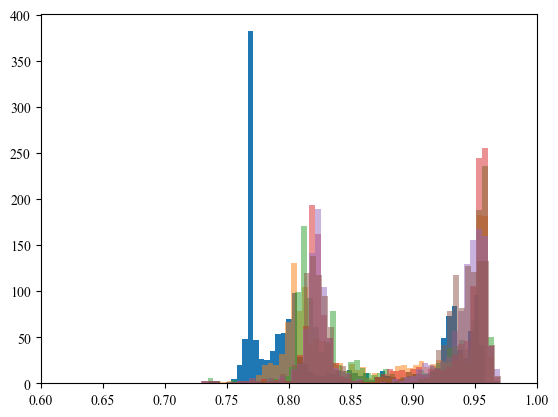

In [230]:
col = 'kfold_mean_f1'
method = lgr

l1 = method.query('penalty == "l1"')
l2 = method.query('penalty == "l2"')

c_01 = method.query('c == 0.1')
c_05 = method.query('c == 0.5')
c_1 = method.query('c == 1')
c_5 = method.query('c == 5')
c_20 = method.query('c == 20')
c_100 = method.query('c == 100')


plt.xlim([0.6, 1])
plt.hist(c_01[col], bins=50)
plt.hist(c_05[col], bins=50, alpha=0.5)
plt.hist(c_1[col], bins=50, alpha=0.5)
plt.hist(c_5[col], bins=50, alpha=0.5)
plt.hist(c_20[col], bins=50, alpha=0.5)
plt.hist(c_100[col], bins=50, alpha=0.5)


##### ▶F値が0.96以上の組み合わせを確認

In [220]:
rulebase_f1 = 0.96
col = 'test_f1'
method = svm
over_rulebase = method.query('kfold_mean_f1 >= @rulebase_f1')

# print(over_rulebase['X_col'].unique())
# print(over_rulebase['ptcnt'].unique())
# print(over_rulebase['c'].unique())
# print(over_rulebase['gamma'].unique())


over_rulebase

,index,kernel,c,gamma,degree,kfold_0_recall,kfold_0_precision,kfold_0_f1,kfold_0_accuracy,kfold_1_recall,...,test_precision,test_f1,test_accuracy,ptcnt_type,ptcnt,X_col,kfold_mean_recall,kfold_mean_precision,kfold_mean_f1,kfold_mean_accuracy
266,2,rbf,1,0.50,1,1.000000,0.947917,0.973262,0.965517,0.967033,...,0.945274,0.964467,0.954839,1,5,startend_seg_cossim,0.980147,0.942812,0.961055,0.950345
267,3,rbf,1,1.00,1,1.000000,0.947917,0.973262,0.965517,0.978022,...,0.945545,0.967089,0.958065,1,5,startend_seg_cossim,0.984542,0.943059,0.963311,0.953103
268,4,rbf,1,5.00,1,1.000000,0.947917,0.973262,0.965517,0.978022,...,0.950249,0.969543,0.961290,1,5,startend_seg_cossim,0.980147,0.948790,0.964170,0.954483
269,5,rbf,1,20.00,1,1.000000,0.947917,0.973262,0.965517,0.967033,...,0.950249,0.969543,0.961290,1,5,startend_seg_cossim,0.973529,0.952783,0.962921,0.953103
271,7,rbf,5,0.10,1,1.000000,0.947917,0.973262,0.965517,0.967033,...,0.945274,0.964467,0.954839,1,5,startend_seg_cossim,0.977949,0.944626,0.960950,0.950345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19374,6,rbf,5,0.01,1,0.978022,0.946809,0.962162,0.951724,0.989011,...,0.954545,0.966752,0.958065,2,83,startend_grad_cossim,0.982369,0.959160,0.970610,0.962759
19375,7,rbf,5,0.10,1,0.978022,0.967391,0.972678,0.965517,1.000000,...,0.959184,0.966581,0.958065,2,83,startend_grad_cossim,0.977900,0.954781,0.966164,0.957241
19380,12,rbf,20,0.01,1,0.978022,0.956989,0.967391,0.958621,0.989011,...,0.954315,0.964103,0.954839,2,83,startend_grad_cossim,0.980147,0.955104,0.967389,0.958621
19381,13,rbf,20,0.10,1,0.978022,0.967391,0.972678,0.965517,0.989011,...,0.959184,0.966581,0.958065,2,83,startend_grad_cossim,0.966838,0.954334,0.960495,0.950345


##### ▶今回使用したデータの元座標数を確認

(array([ 47.,  82., 180., 178., 108.,  63.,  31.,  32.,  26.,  24.,  16.,
         22.,  14.,  24.,  13.,  21.,  16.,   4.,   5.,  11.,   5.,   6.,
         14.,   5.,   9.,   7.,   7.,   4.,   3.,   4.,   0.,   2.,   2.,
          4.,   1.,   6.,   4.,   1.,   1.,   1.,   2.,   1.,   1.,   0.,
          2.,   1.,   0.,   0.,   2.,   1.,   1.,   0.,   2.,   1.,   0.,
          1.,   0.,   1.,   0.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,
          0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

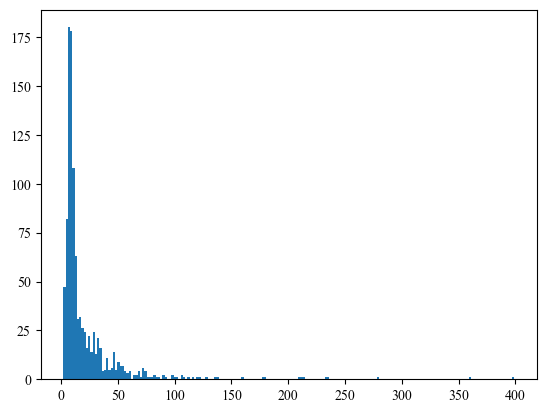

In [242]:
data = pd.read_pickle('../data/shape_groudtruth_data.pkl')

plt.hist(data['pt_cnt'], bins=200)

In [246]:
TRAIN_TEST_SPLIT_SEED = 1
Y_COL = 'saito_label'
data = pd.read_csv(f'../temp/eachpt_feature/{1}_{3}_org_coord.csv', delimiter=',', index_col=0)
X = data.copy()
y = data[Y_COL]
# 学習データとテストデータを725:310に分割する
train_valid, test, y_train_valid, y_test = train_test_split(X, y, train_size=725, shuffle=True, stratify=y, random_state=TRAIN_TEST_SPLIT_SEED)

In [247]:
data.query()

,drawing_id,stroke_id,saito_label,is_good_saito,is_good_rulebase,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5
421,92,118,straight,1,1,12.824427,17.633588,16.030534,0.000000,420.000000,394.351145
501,957,103,straight,1,1,420.000000,394.429224,0.000000,0.000000,12.146119,295.342466
289,3,109,straight,1,1,0.000000,233.560976,235.609756,0.000000,420.000000,415.902439
466,955,582,straight,1,1,281.871658,0.000000,8.983957,4.491979,420.000000,404.278075
1005,959,1480,complex,0,0,242.988506,0.000000,67.586207,8.582375,309.501916,420.000000
...,...,...,...,...,...,...,...,...,...,...,...
504,957,1148,straight,1,1,420.000000,0.000000,13.745455,0.000000,231.127273,224.000000
11,100,1716,straight,1,1,0.000000,10.243902,420.000000,0.000000,13.658537,123.902439
963,956,2604,complex,0,0,316.842105,420.000000,257.894737,162.105263,114.210526,0.000000
623,352,1422,curve,1,1,420.000000,92.105263,0.000000,0.000000,416.315789,305.789474
